In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('hotel_booking.csv')
pd.set_option('display.max_columns', 40)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [11]:
#Basic data exploration
df.shape

(119390, 36)

In [13]:
pd.DataFrame(df.isna().sum())

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [15]:
pd.DataFrame(df.isna().sum()/1193.90)

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


- Company column has more than 94% values missing
- Agent column also has 16% null values

## EDA and Data Cleaning

In [18]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Removing personal data fields

In [22]:
df = df.drop(['name', 'email','phone-number','credit_card'], axis=1)

In [24]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [26]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [27]:
df = df.drop(['company'], axis=1)

In [28]:
df = df.drop(['agent'], axis=1)

In [34]:
df.dropna(inplace = True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

In [36]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [37]:
# Calculate the first and third quartiles (Q1 and Q3) for all columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [39]:
# Calculate the Interquartile Range (IQR) for all columns
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers for all columns
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [41]:
Q1

is_canceled                          0.0
lead_time                           18.0
arrival_date_year                 2016.0
arrival_date_week_number            16.0
arrival_date_day_of_month            8.0
stays_in_weekend_nights              0.0
stays_in_week_nights                 1.0
adults                               2.0
children                             0.0
babies                               0.0
is_repeated_guest                    0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
booking_changes                      0.0
days_in_waiting_list                 0.0
adr                                 70.0
required_car_parking_spaces          0.0
total_of_special_requests            0.0
Name: 0.25, dtype: float64

In [45]:
# Define indices of rows you want to remove
rows_to_remove = [2, 3, 4]

# Create a boolean mask
mask = Q1.index.isin(rows_to_remove)

# Remove rows using the mask
Q1 = Q1[~mask]


In [46]:
Q1

is_canceled                          0.0
lead_time                           18.0
arrival_date_year                 2016.0
arrival_date_week_number            16.0
arrival_date_day_of_month            8.0
stays_in_weekend_nights              0.0
stays_in_week_nights                 1.0
adults                               2.0
children                             0.0
babies                               0.0
is_repeated_guest                    0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
booking_changes                      0.0
days_in_waiting_list                 0.0
adr                                 70.0
required_car_parking_spaces          0.0
total_of_special_requests            0.0
Name: 0.25, dtype: float64

In [42]:
# Find rows with outliers in any column
outlier_rows = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Remove rows with outliers
df = df[~outlier_rows]

print("DataFrame without outliers:")
print(df_no_outliers)

<ipython-input-42-f1cd72caea1f>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_rows = ((df < lower_bound) | (df > upper_bound)).any(axis=1)


TypeError: Invalid comparison between dtype=datetime64[ns] and ndarray

In [43]:
type(Q1)

pandas.core.series.Series

In [47]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [51]:
cancelled_percentage = df['is_canceled'].value_counts(normalize = True)*100
cancelled_percentage

0    62.864808
1    37.135192
Name: is_canceled, dtype: float64

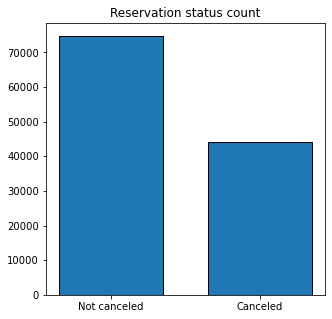

In [55]:
plt.figure(figsize = (5,5))
plt.title('Reservation status count')
plt.bar(['Not canceled', 'Canceled'],df['is_canceled'].value_counts(),edgecolor = 'k',width = 0.7)
plt.show()

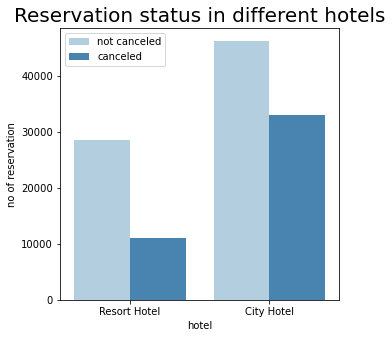

In [58]:
plt.figure(figsize = (5,5))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
#ax1.legend(bbox_to_anchor(1,1))
plt.title('Reservation status in different hotels',size = 20)
plt.xlabel('hotel')
plt.ylabel('no of reservation')
plt.legend(['not canceled','canceled'])
plt.show()

In [62]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)*100

0    72.024952
1    27.975048
Name: is_canceled, dtype: float64

In [63]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)*100

0    58.29109
1    41.70891
Name: is_canceled, dtype: float64

In [66]:
resort_hotel_adr = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_adr = city_hotel.groupby('reservation_status_date')[['adr']].mean()

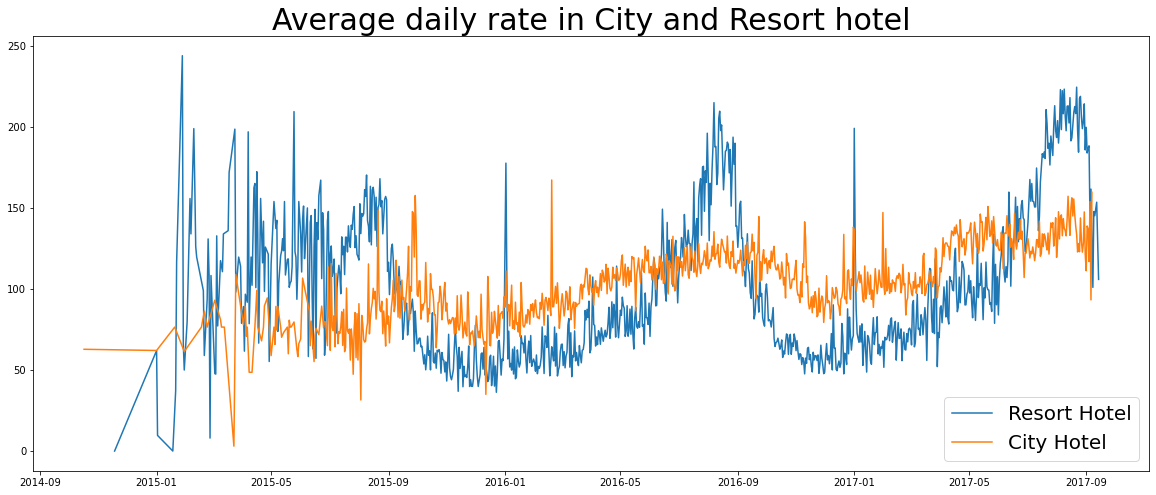

In [70]:
plt.figure(figsize = (20,8))
plt.title('Average daily rate in City and Resort hotel',fontsize = 30)
plt.plot(resort_hotel_adr.index, resort_hotel_adr['adr'], label = 'Resort Hotel')
plt.plot(city_hotel_adr.index, city_hotel_adr['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

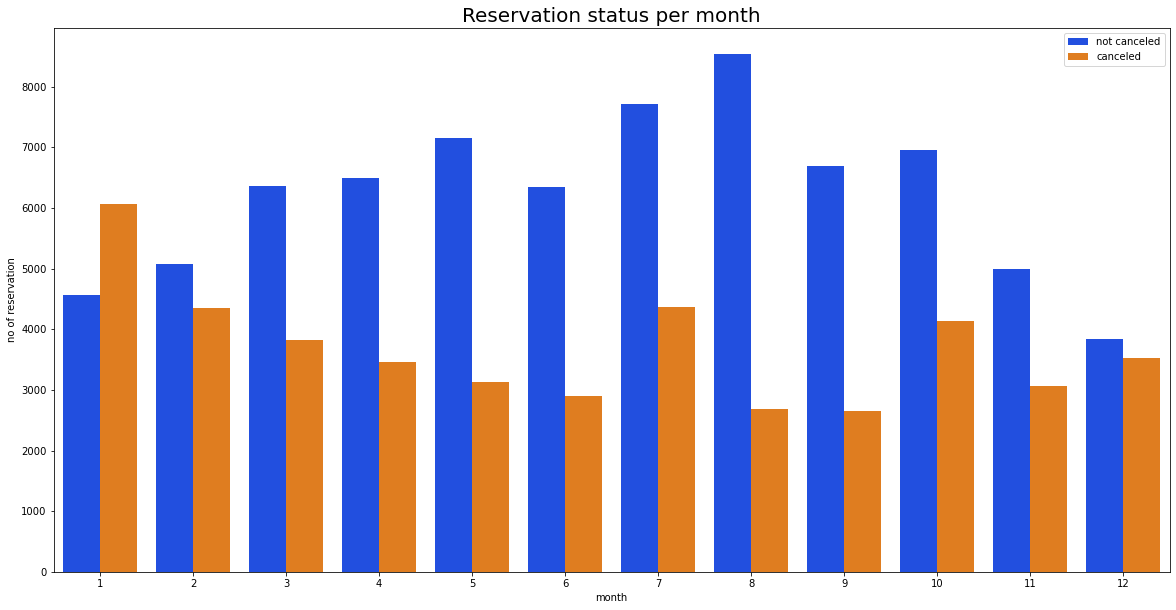

In [80]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (20,10))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright')
legend_labels,_ = ax1.get_legend_handles_labels()
#ax1.legend(bbox_to_anchor(1,1))
plt.title('Reservation status per month',size = 20)
plt.xlabel('month')
plt.ylabel('no of reservation')
plt.legend(['not canceled','canceled'])
plt.show()

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


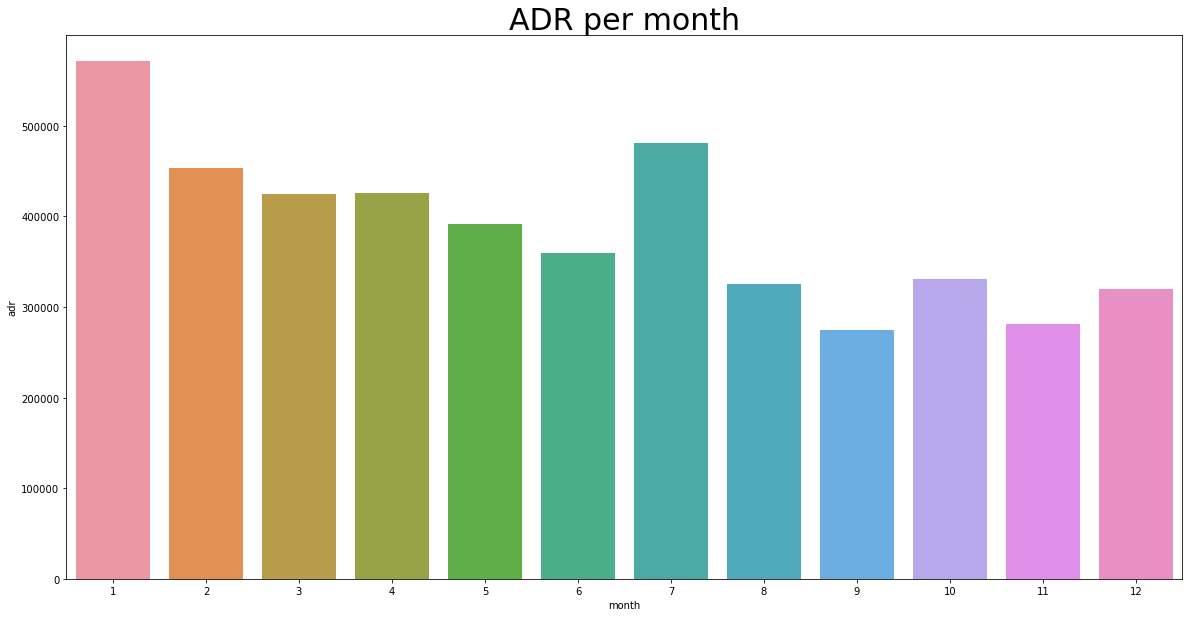

In [81]:
plt.figure(figsize = (20,10))
plt.title('ADR per month', fontsize = 30)
sns.barplot('month','adr', data = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

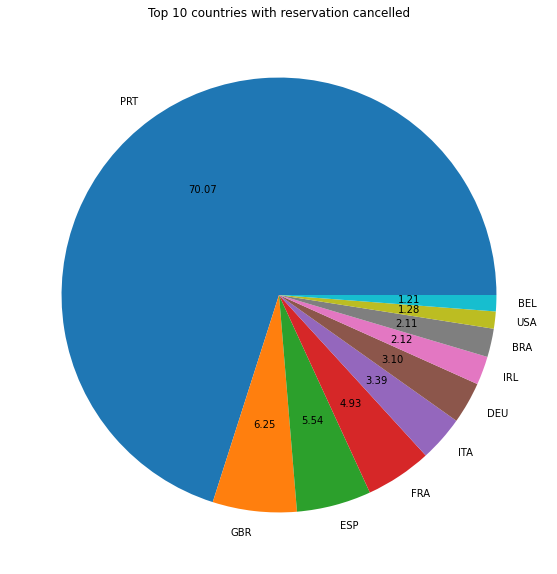

In [82]:
canceled_data = df[df['is_canceled'] == 1]
top_10_countries = canceled_data['country'].value_counts()[:10]
plt.figure(figsize = (10,10))
plt.title('Top 10 countries with reservation cancelled')
plt.pie(top_10_countries, autopct = '%.2f', labels = top_10_countries.index)
plt.show()


In [87]:
df['market_segment'].value_counts(normalize = True)*100

Online TA        47.437299
Offline TA/TO    20.319938
Groups           16.657976
Direct           10.469478
Corporate         4.298643
Complementary     0.617336
Aviation          0.199331
Name: market_segment, dtype: float64

In [88]:
canceled_data['market_segment'].value_counts(normalize = True)*100

Online TA        46.968496
Groups           27.397912
Offline TA/TO    18.748443
Direct            4.348515
Corporate         2.215025
Complementary     0.203837
Aviation          0.117772
Name: market_segment, dtype: float64

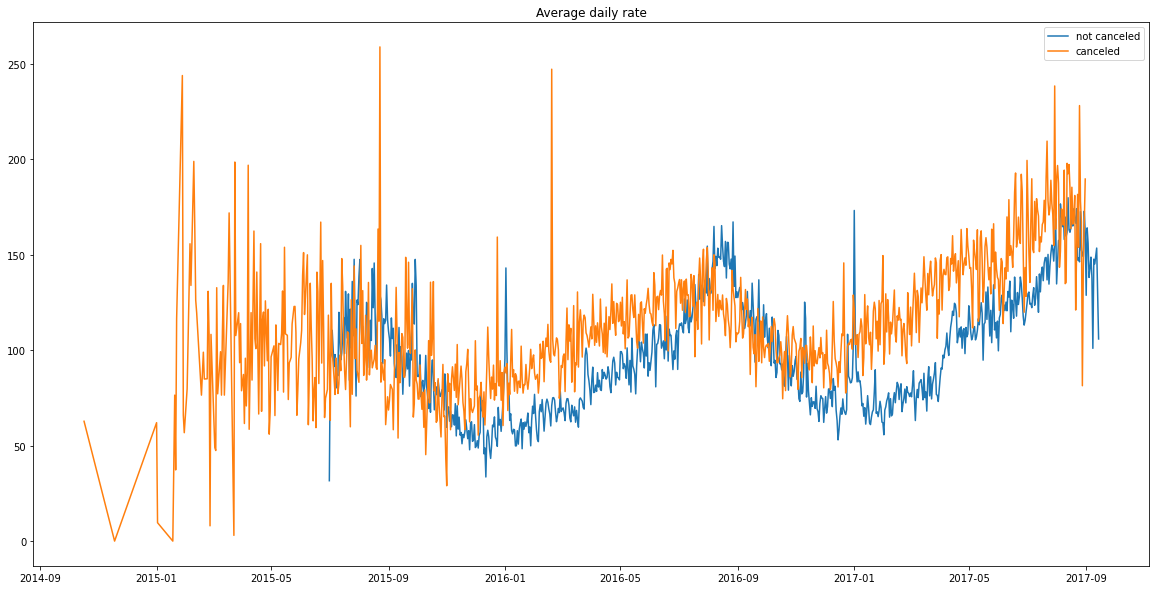

In [92]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace = True)
canceled_df_adr.sort_values('reservation_status_date', inplace = True)

not_canceled_data = df[df['is_canceled'] == 0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace = True)
not_canceled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,10))
plt.title('Average daily rate')
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'],label = 'not canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'],label = 'canceled')
plt.legend()
